# Data Explore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

## MEMBERS dataset

In [2]:
MEMBERS = pd.read_csv("../data/raw/MEMBERS_subset_TRAIN.csv", parse_dates=True)

In [3]:
MEMBERS["gender"] = MEMBERS["gender"].fillna(value="Not specified")

In [4]:
MEMBERS.describe()

,city,bd,registered_via,_dataobs_
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,3.830780,9.759410,5.255210,3.380133e+06
std,5.464354,16.317812,2.360829,1.956257e+06
min,1.000000,-506.000000,1.000000,1.510000e+02
25%,1.000000,0.000000,4.000000,1.684020e+06
50%,1.000000,0.000000,4.000000,3.377832e+06
75%,4.000000,21.000000,7.000000,5.067187e+06
max,22.000000,1029.000000,19.000000,6.769339e+06


There are 3 kind of data in `bd` column:
1. Lay in 0 - 100 norm range, we regard them as correct data
2. Less than 0, negative age, which is absolutly wrong.
3. Larger than 100, 

In [5]:
MEMBERS[((MEMBERS["bd"] < 5) | (MEMBERS["bd"] > 100)) & (MEMBERS["bd"] != 0)]

,msno,registration_init_time,city,bd,gender,registered_via,_dataobs_
4984,V613b6dLR0cAlesOz4zczyw6c53zckeRFAhbU2UFhlI=,2016-05-07,6,112,male,4,332258
5553,vp3Ja0V65+r9Y5P8xtOM5X0RmXS4JJijlC4QLsdvoVM=,2007-06-03,15,116,female,9,371939
5624,baCn6vaLEyJgTBk98kWkybTTT82raeRroY1MPwxB07Y=,2015-03-29,5,111,male,3,376070
7984,C+P5k4ry5XguQC5K1qvNnqYYHRN0Syg1bTHz2PyBZwY=,2015-08-08,1,104,male,3,538321
8716,JNMrN67b3YYDaJkD39anhygjxJ+kEVFxOKGRKEglCkg=,2015-07-22,4,112,male,3,586844
9803,IMZo4qrmJS47ZoL2otIFTWbUicDtI6XCgVtulI10bYo=,2014-07-05,9,117,female,9,659936
9987,fHMVKnZEpjJd+5bBBiBmCyZX23KsCLBurSxTTFaD6Fs=,2014-07-03,15,-42,Not specified,9,672655
9992,ZBEKqHknIvlV18wqSe/XqVaRoMc9pyl00YwhutY38EU=,2015-11-07,1,101,male,4,673356
10574,y5+XzsUCmcfeBw9Ucm2pXsIxHwjOzZR52W6reImuwSs=,2015-02-02,5,112,male,3,712894
11884,5WmihsNNWgDB1FXOLu/TW2i869XAl9ZjW1QMpQQkorc=,2010-09-19,18,106,male,9,802041


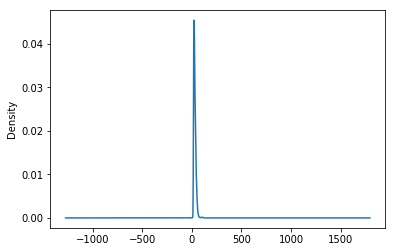

In [6]:
MEMBERS[MEMBERS["bd"] != 0].bd.plot.density()

In [7]:
MEMBERS["info_complete"] = ((MEMBERS["bd"] > 5) & (MEMBERS["bd"] < 100)) & (MEMBERS["gender"] != "Not specified")

In [8]:
MEMBERS["info_complete"].describe()

count     100000
unique         2
top        False
freq       67996
Name: info_complete, dtype: object

In [47]:
MEMBERS["bd"][(MEMBERS["bd"] < 5) | (MEMBERS["bd"] > 100)] = MEMBERS["bd"][(MEMBERS["bd"] > 5) & (MEMBERS["bd"] < 100)].mean()

C:\Users\AlexanderLiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
MEMBERS["reg_Year"] = MEMBERS["registration_init_time"].map(lambda x: int(x[:4]))

In [10]:
MEMBERS["reg_Year"].head()

0    2014
1    2014
2    2014
3    2014
4    2014
Name: reg_Year, dtype: object

## STATUS dataset

In [11]:
STATUS = pd.read_csv("../data/raw/STATUS_subset_TRAIN.csv")

In [12]:
STATUS.head()

,msno,status
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,1
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,1


In [13]:
STATUS['status'] = STATUS['status'].astype(str)
STATUS['status'].value_counts()

1    31577
0    18139
Name: status, dtype: int64

## TRANSACTION dataset

In [14]:
TRANSACTION = pd.read_csv("../data/raw/TRANSACTION_subset_TRAIN.csv")

In [15]:
TRANSACTION.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_
0,++38dVm0EHKCOfND6oEal3xFKtqJYZTZJmnpbAOOZBk=,41,30,99,99,1,2016-10-23,2016-11-23,0,288
1,++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,41,30,149,149,1,2015-09-10,2015-09-10,1,325
2,++7IULiyKbNc8jllqhRuyKZjX1J4mPF4tsudFCJfv4k=,37,30,149,149,1,2015-08-01,2015-09-01,0,649
3,++AQDoOxAjCANtzB0K8e0PUE42NzvA3MsXpTFCpArdg=,28,30,150,150,0,2015-07-29,2015-08-28,0,858
4,++GsvnZ4JH4atR+6ObvwrVhDQv9Y1jc7zuTIF4Fv0o8=,41,30,99,99,1,2016-07-14,2016-08-14,0,1357


In [16]:
Not_monthly_sub = TRANSACTION[(TRANSACTION['payment_plan_days'] != 30) & (TRANSACTION['payment_plan_days'] != 31)]

In [17]:
Not_monthly_sub['payment_plan_days'].astype(str)
Not_monthly_sub.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_
10,++bDPvADB3xzZQnzw90BPCf+OXPBV3hKfzl9vCVIwNM=,35,7,0,0,0,2016-10-28,2016-11-04,0,2834
11,++bjW+qfoSxUnQRCJnZ1khb4qpbT01JwViLze8mTOAk=,41,0,0,149,1,2015-05-11,2015-06-11,0,2921
16,++qTmh4qA8N9/jpTo4sNdzOoQt8ZepzMQ5cfqcFGlGI=,41,0,0,129,1,2015-04-26,2015-05-27,0,4378
25,+/HX2PT+BDrt9ffaSx9NXlaK5GLM+qrsQiqCza6OESU=,34,0,0,149,1,2015-03-31,2015-04-30,0,6584
39,+/is/5hKXj7dKIjfnYM9ETWZ3ce7P4ZUiFliqQRx20w=,38,410,1788,1788,0,2016-09-20,2017-11-04,0,8641


In [18]:
from datetime import datetime
from datetime import timedelta

TRANSACTION['transaction_date'] = TRANSACTION['transaction_date'].map(lambda x: datetime(int(x[:4]), int(x[5:7]), int(x[8:])))
TRANSACTION['membership_expire_date'] = TRANSACTION['membership_expire_date'].map(lambda x: datetime(int(x[:4]), int(x[5:7]), int(x[8:])))

In [19]:
TRANSACTION['membership_period'] = TRANSACTION['membership_expire_date'] - TRANSACTION['transaction_date']

In [20]:
TRANSACTION['payment_plan_days2'] = TRANSACTION['payment_plan_days'].map(lambda x: timedelta(x))

In [21]:
TRANSACTION[TRANSACTION['payment_plan_days2'] != TRANSACTION['membership_period']]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_,membership_period,payment_plan_days2
0,++38dVm0EHKCOfND6oEal3xFKtqJYZTZJmnpbAOOZBk=,41,30,99,99,1,2016-10-23,2016-11-23,0,288,31 days,30 days
1,++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,41,30,149,149,1,2015-09-10,2015-09-10,1,325,0 days,30 days
2,++7IULiyKbNc8jllqhRuyKZjX1J4mPF4tsudFCJfv4k=,37,30,149,149,1,2015-08-01,2015-09-01,0,649,31 days,30 days
4,++GsvnZ4JH4atR+6ObvwrVhDQv9Y1jc7zuTIF4Fv0o8=,41,30,99,99,1,2016-07-14,2016-08-14,0,1357,31 days,30 days
5,++Jb6VCdI1Xil6gRxVfr/qdnhbSYLD85Ox8i/AN1RP4=,41,30,149,149,1,2016-03-08,2016-04-08,0,1584,31 days,30 days
6,++Jgz/7glh4OFgjoBC9t1zIrRCogvp8P7wYf2jpsir4=,40,31,149,149,1,2015-02-10,2015-03-09,0,1599,27 days,31 days
7,++SObbXkeo9UzYsb0pdwh83ttkI1oIaAZPqii8trV4o=,41,30,99,99,1,2016-10-15,2016-11-15,0,2163,31 days,30 days
8,++UQzrkieZOoBJGx2UyjVOLGdfeyFBHybf4TNeXZVSM=,41,30,99,99,1,2017-01-31,2017-02-28,0,2277,28 days,30 days
9,++XADsvsghJObw0mtDMmwhgsxcIka1sSXUqI+awkyf8=,39,31,149,149,1,2015-01-31,2015-03-08,0,2501,36 days,31 days
11,++bjW+qfoSxUnQRCJnZ1khb4qpbT01JwViLze8mTOAk=,41,0,0,149,1,2015-05-11,2015-06-11,0,2921,31 days,0 days


In [22]:
TRANSACTION[TRANSACTION["plan_list_price"] != TRANSACTION["actual_amount_paid"]]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_,membership_period,payment_plan_days2
11,++bjW+qfoSxUnQRCJnZ1khb4qpbT01JwViLze8mTOAk=,41,0,0,149,1,2015-05-11,2015-06-11,0,2921,31 days,0 days
16,++qTmh4qA8N9/jpTo4sNdzOoQt8ZepzMQ5cfqcFGlGI=,41,0,0,129,1,2015-04-26,2015-05-27,0,4378,31 days,0 days
25,+/HX2PT+BDrt9ffaSx9NXlaK5GLM+qrsQiqCza6OESU=,34,0,0,149,1,2015-03-31,2015-04-30,0,6584,30 days,0 days
30,+/POEfZTiZXab52KAylsVF73K92L1N1dbzxtya1cy5A=,41,30,149,0,1,2015-10-14,2015-11-14,0,7157,31 days,30 days
32,+/TR9RCS4MnDpgn6VESmkwrcVzCBZIzXWZrJEdVJ2hk=,41,30,149,0,1,2015-12-03,2016-01-03,0,7481,31 days,30 days
36,+/bYUjd3W3M3gF2RAg3a59xDYfZ4K9yp/wqvs8M+UOo=,41,30,149,0,1,2015-11-28,2015-12-31,0,8001,33 days,30 days
53,+0B7J43k8tHL6AdjUEYwSXXKTlITzImYsPkzuIK5y0A=,41,30,149,0,1,2015-09-27,2015-09-30,1,11261,3 days,30 days
58,+0PugnuareDBoZNSLF7TXyi/YdML4rI0nc/zNhbY8zU=,41,30,149,0,1,2016-01-02,2016-01-02,1,12430,0 days,30 days
79,+0xDtlx8/0vMhabw7zCuES1ux/G9egVqHo6Rbbn+ers=,41,30,149,119,1,2015-08-03,2015-09-03,0,15661,31 days,30 days
85,+1DpbtT3nkKzzG6/KvW+ivEfV0GOX51k/mn7o4bzR0s=,33,0,0,149,1,2015-07-31,2015-08-31,0,17031,31 days,0 days


In [23]:
TRANSACTION['pay_id:is_auto_renew'] = TRANSACTION['payment_method_id'] * TRANSACTION['is_auto_renew']

In [24]:
TRANSACTION['is_auto_renew:is_cancel'] = TRANSACTION['is_cancel'] * TRANSACTION['is_auto_renew']

In [25]:
TRANSACTION['payment_increase'] = 0
temp_index = (TRANSACTION['plan_list_price'] < TRANSACTION['actual_amount_paid']).copy()
TRANSACTION['payment_increase'][temp_index] = 1

C:\Users\AlexanderLiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
TRANSACTION['payment_decrease'] = 0
temp_index = (TRANSACTION['plan_list_price'] > TRANSACTION['actual_amount_paid']).copy()
TRANSACTION['payment_decrease'][temp_index] = 1

C:\Users\AlexanderLiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
TRANSACTION['payment_tozero'] = 0
temp_index = ((TRANSACTION['plan_list_price'] != 0) & (TRANSACTION['actual_amount_paid'] == 0)).copy()
TRANSACTION['payment_tozero'][temp_index] = 1

C:\Users\AlexanderLiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
TRANSACTION['new_payer'] = 0
temp_index = ((TRANSACTION['plan_list_price'] == 0) & (TRANSACTION['actual_amount_paid'] != 0)).copy()
TRANSACTION['new_payer'][temp_index] = 1

C:\Users\AlexanderLiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
TRANSACTION.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_,membership_period,payment_plan_days2,pay_id:is_auto_renew,is_auto_renew:is_cancel,payment_increase,payment_decrease,payment_tozero,new_payer
0,++38dVm0EHKCOfND6oEal3xFKtqJYZTZJmnpbAOOZBk=,41,30,99,99,1,2016-10-23,2016-11-23,0,288,31 days,30 days,41,0,0,0,0,0
1,++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,41,30,149,149,1,2015-09-10,2015-09-10,1,325,0 days,30 days,41,1,0,0,0,0
2,++7IULiyKbNc8jllqhRuyKZjX1J4mPF4tsudFCJfv4k=,37,30,149,149,1,2015-08-01,2015-09-01,0,649,31 days,30 days,37,0,0,0,0,0
3,++AQDoOxAjCANtzB0K8e0PUE42NzvA3MsXpTFCpArdg=,28,30,150,150,0,2015-07-29,2015-08-28,0,858,30 days,30 days,0,0,0,0,0,0
4,++GsvnZ4JH4atR+6ObvwrVhDQv9Y1jc7zuTIF4Fv0o8=,41,30,99,99,1,2016-07-14,2016-08-14,0,1357,31 days,30 days,41,0,0,0,0,0


## USER_LOGS dataset

In [38]:
USER_LOGS = pd.read_csv("../data/raw/USER_LOGS_subset_TRAIN.csv")

In [39]:
USER_LOGS.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,_dataobs_
0,KrtHMRcPO1hhclZLDp7Rfd4EuWnkeE3uIYLhh2bjOAs=,2015-01-04,5,1,2,3,8,16,3105.657,6323
1,/osNsLxx3k7if1esxb2GpYHNkHnmNPOU3292bANjBGc=,2017-02-26,1,0,2,0,5,8,1592.751,7000
2,9/WzsCZLLsiNdZSbJXwtDotjEIRcFoAuSp84CH4GArw=,2015-05-25,0,0,0,0,15,15,2422.230,7527
3,wZhG4MNE0HD00iHO0dhRH0P8dkqE9rZGuZVmF8Hf0SM=,2015-04-17,0,0,0,0,47,1,9668.558,9062
4,vuiqdXbZfyKDbUx5Y8drB6NAUxuvR6P5/Rj8+8b21JM=,2017-01-31,2,3,3,1,70,31,18793.319,9953


In [32]:
USER_LOGS.describe()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,_dataobs_
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05
mean,6.55941,1.649440,1.015130,1.126220,30.62194,30.066780,-1.291272e+12,1.955153e+08
std,14.55745,4.261639,2.180676,2.732274,40.73382,33.896641,1.091253e+14,1.131440e+08
min,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,-9.223372e+15,6.323000e+03
25%,0.00000,0.000000,0.000000,0.000000,6.00000,8.000000,1.878381e+03,9.803536e+07
50%,2.00000,1.000000,0.000000,0.000000,16.00000,19.000000,4.614436e+03,1.950406e+08
75%,7.00000,2.000000,1.000000,1.000000,38.00000,40.000000,1.026148e+04,2.931583e+08
max,1187.00000,343.000000,143.000000,172.000000,1632.00000,1190.000000,2.419718e+06,3.921047e+08


In [42]:
num_25 = USER_LOGS['num_25'] * 0.125
num_50 = USER_LOGS['num_50'] * 0.375
num_75 = USER_LOGS['num_75'] * 0.625
num_985 = USER_LOGS['num_985'] * 0.8675
num_100 = USER_LOGS['num_100'] * 0.9925
USER_LOGS['mean_num'] = (num_25 + num_50 + num_75 + num_985 + num_100) / (0.125 + 0.375 + 0.625 + 0.8675 + 0.9925)

In [43]:
USER_LOGS['mean_num']

0         4.285595
1         2.123116
2         4.987437
3        15.627303
4        24.654104
5         3.866834
6         7.989950
7         0.332496
8         7.406198
9         0.581240
10       21.536013
11       20.043551
12        2.992462
13        2.701843
14       18.051089
15        5.450586
16        2.078727
17       13.467337
18        7.566164
19        3.536851
20       16.171692
21        1.246231
22        5.448074
23        3.908710
24        2.327471
25       24.412898
26       12.304858
27        9.484925
28        2.494975
29        0.293132
           ...    
99970    14.427973
99971    10.935511
99972     2.246231
99973     1.871859
99974     1.994975
99975    31.144054
99976     3.824958
99977    24.666667
99978     1.662479
99979     9.809883
99980     1.662479
99981    28.060302
99982    25.937186
99983     0.332496
99984     1.871859
99985     4.170017
99986    27.741206
99987     0.332496
99988     8.561139
99989    16.072027
99990     0.955611
99991     2.

In [44]:
USER_LOGS['tot_num'] = USER_LOGS['num_25'] + USER_LOGS['num_50'] + USER_LOGS['num_75'] + USER_LOGS['num_985'] + USER_LOGS['num_100'] 

In [45]:
USER_LOGS['tot_unq_ratio'] = USER_LOGS['tot_num'] / USER_LOGS['num_unq']
USER_LOGS['mean_unq_ratio'] = USER_LOGS['mean_num'] / USER_LOGS['num_unq']

In [46]:
USER_LOGS['Year'] = USER_LOGS['date'].map(lambda x: int(x[:4]))
USER_LOGS['Month'] = USER_LOGS['date'].map(lambda x: int(x[5:7]))

## Output dataset

In [49]:
MEMBERS.to_csv('../data/processed/MEMBERS.csv')
TRANSACTION.to_csv('../data/processed/TRANSACTION.csv')
USER_LOGS.to_csv('../data/processed/USER_LOGS.csv')
STATUS.to_csv('../data/processed/STATUS.csv')